0.4644082332761578
50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.64      0.99      0.78      2498
       Relay       0.96      0.35      0.52      2166

    accuracy                           0.69      4664
   macro avg       0.80      0.67      0.65      4664
weighted avg       0.79      0.69      0.65      4664



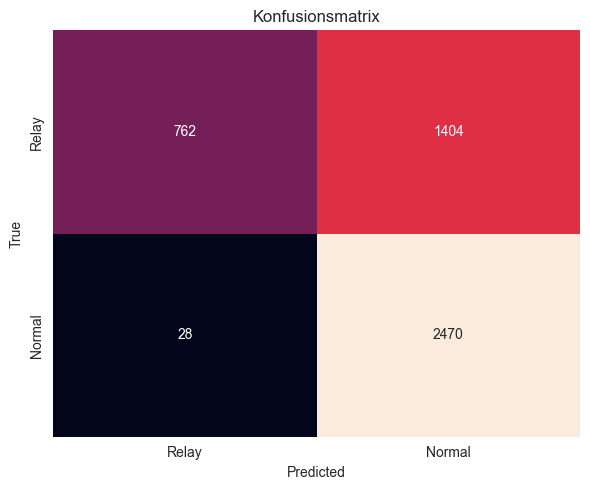

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.lof import LOF

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {50}:
    clf = LOF(contamination=0.01, n_neighbors=n, metric='manhattan', novelty=True)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.99      0.77      2498
       Relay       0.96      0.32      0.48      2166

    accuracy                           0.68      4664
   macro avg       0.79      0.65      0.62      4664
weighted avg       0.78      0.68      0.63      4664



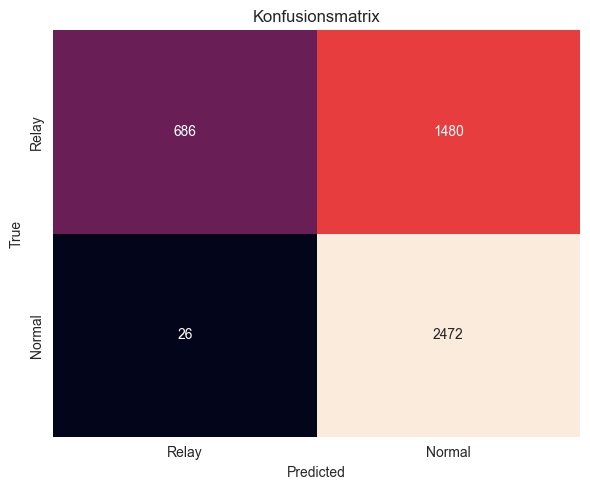

21

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.99      0.76      2498
       Relay       0.96      0.28      0.43      2166

    accuracy                           0.66      4664
   macro avg       0.78      0.63      0.59      4664
weighted avg       0.77      0.66      0.60      4664



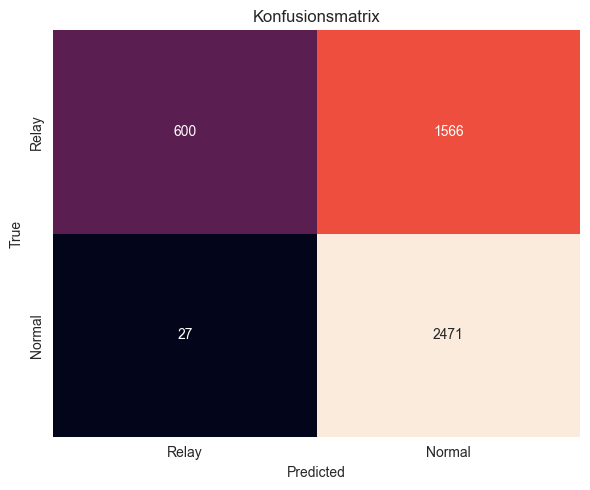

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.99      0.76      2498
       Relay       0.96      0.29      0.45      2166

    accuracy                           0.66      4664
   macro avg       0.79      0.64      0.60      4664
weighted avg       0.78      0.66      0.61      4664



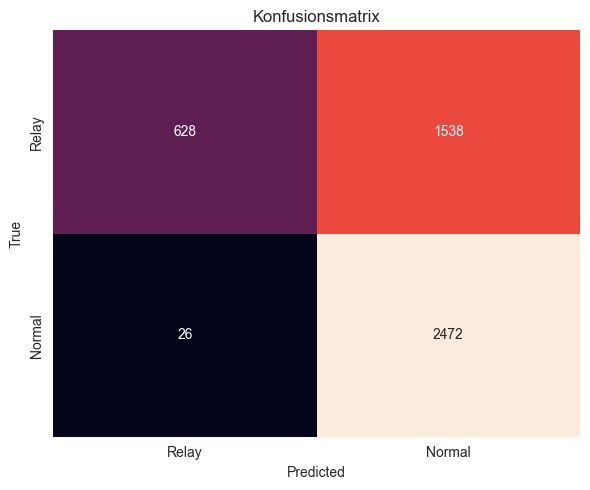

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.lof import LOF

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {21, 30, 50}:
    clf = LOF(contamination=0.01, n_neighbors=n, novelty=True)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.99      0.77      2498
       Relay       0.96      0.32      0.48      2166

    accuracy                           0.68      4664
   macro avg       0.79      0.65      0.62      4664
weighted avg       0.78      0.68      0.63      4664



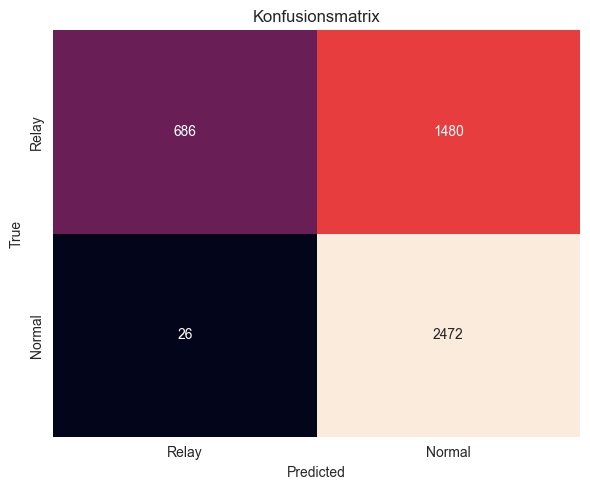

21

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.99      0.76      2498
       Relay       0.96      0.28      0.43      2166

    accuracy                           0.66      4664
   macro avg       0.78      0.63      0.59      4664
weighted avg       0.77      0.66      0.60      4664



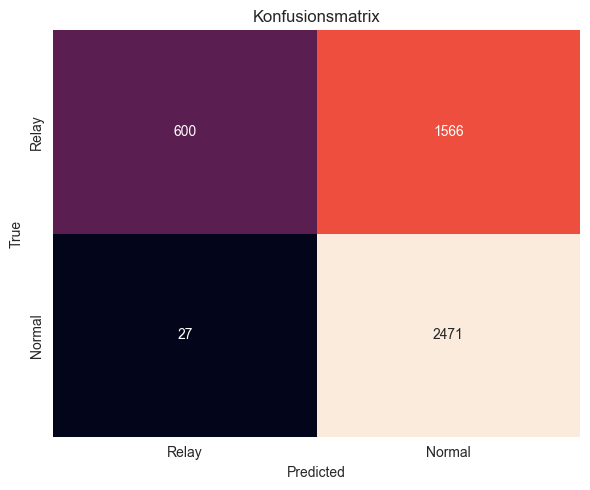

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.99      0.76      2498
       Relay       0.96      0.29      0.45      2166

    accuracy                           0.66      4664
   macro avg       0.79      0.64      0.60      4664
weighted avg       0.78      0.66      0.61      4664



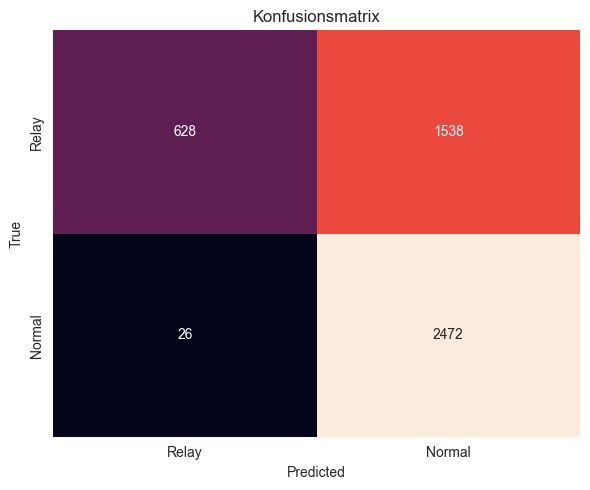

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.lof import LOF

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {21, 30, 50}:
    clf = LOF(contamination=0.01, n_neighbors=n, metric='euclidean', novelty=True)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.64      0.99      0.78      2498
       Relay       0.96      0.35      0.52      2166

    accuracy                           0.69      4664
   macro avg       0.80      0.67      0.65      4664
weighted avg       0.79      0.69      0.65      4664



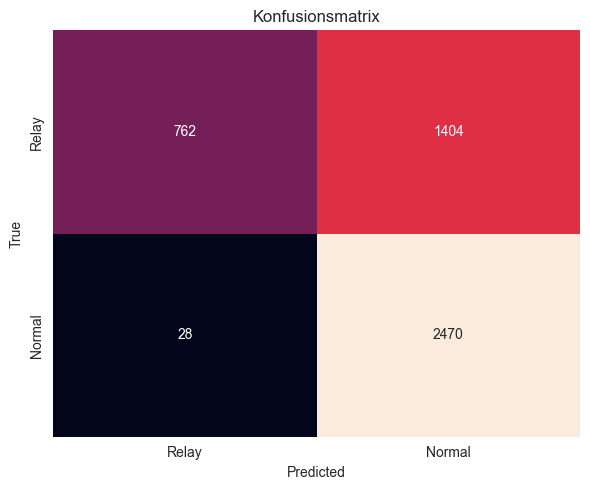

21

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.99      0.76      2498
       Relay       0.96      0.29      0.44      2166

    accuracy                           0.66      4664
   macro avg       0.79      0.64      0.60      4664
weighted avg       0.77      0.66      0.61      4664



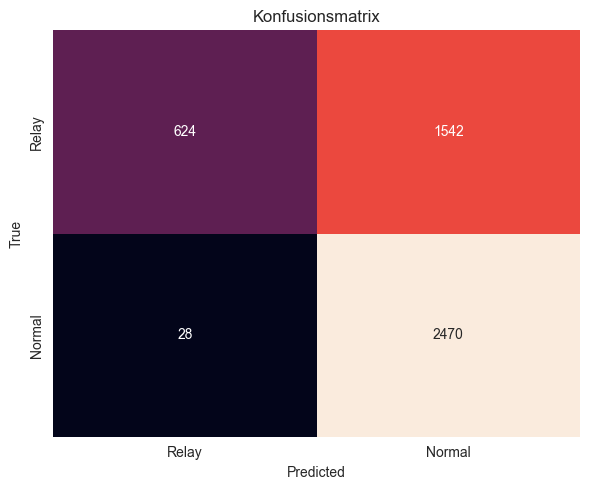

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.99      0.77      2498
       Relay       0.96      0.31      0.47      2166

    accuracy                           0.68      4664
   macro avg       0.79      0.65      0.62      4664
weighted avg       0.78      0.68      0.63      4664



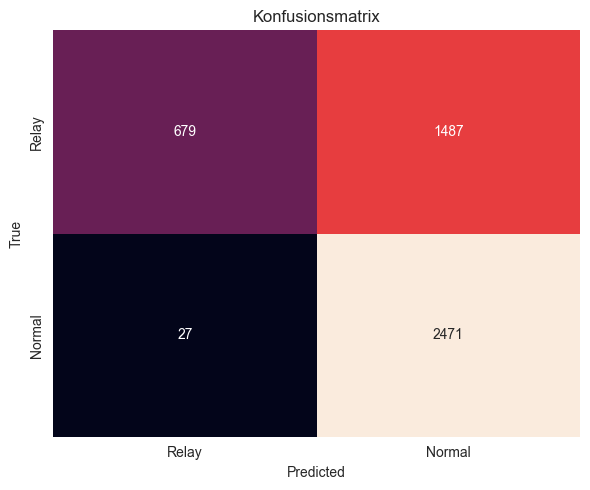

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.lof import LOF

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {21, 30, 50}:
    clf = LOF(contamination=0.01, n_neighbors=n, metric='cityblock', novelty=True)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.99      0.77      2498
       Relay       0.97      0.32      0.48      2166

    accuracy                           0.68      4664
   macro avg       0.80      0.65      0.62      4664
weighted avg       0.79      0.68      0.63      4664



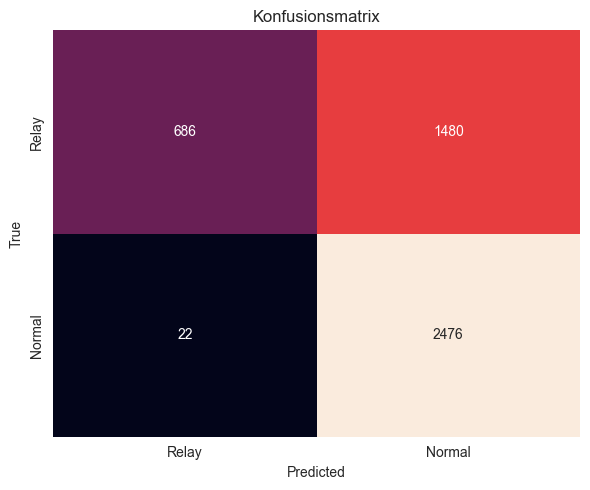

21

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.99      0.77      2498
       Relay       0.96      0.32      0.48      2166

    accuracy                           0.68      4664
   macro avg       0.79      0.66      0.62      4664
weighted avg       0.78      0.68      0.63      4664



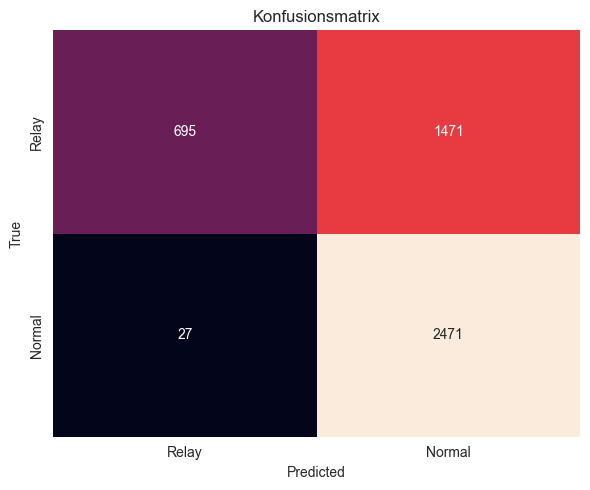

30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.99      0.77      2498
       Relay       0.97      0.32      0.48      2166

    accuracy                           0.68      4664
   macro avg       0.80      0.66      0.62      4664
weighted avg       0.78      0.68      0.64      4664



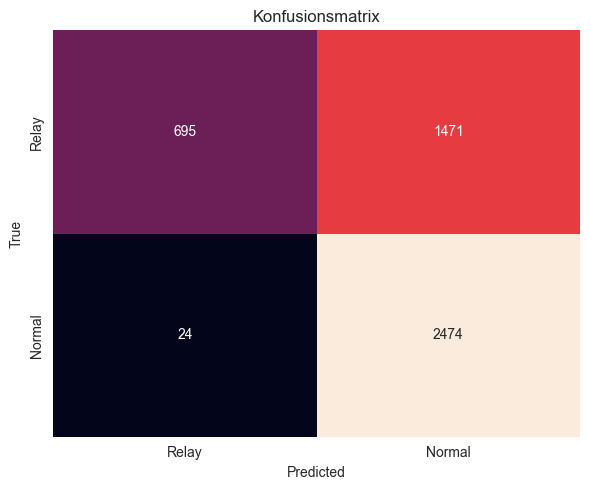

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.lof import LOF

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {21, 30, 50}:
    clf = LOF(contamination=0.01, n_neighbors=n, metric='cosine', novelty=True)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()